# unsupervised learning algorithm:-
    1.clustering algorithm
    a.K-means algorithm
    b.Hierarchical Clustering algorithm

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings   
warnings.filterwarnings('ignore')

In [2]:
mc=pd.read_csv("Mall_Customers.csv")
mc.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#check null values
mc.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

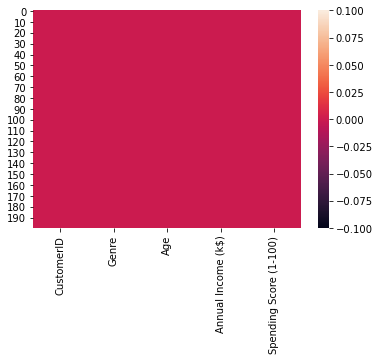

In [4]:
#check null values with graph
sb.heatmap(mc.isnull())
plt.show()

In [5]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mc.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
mc.shape

(200, 5)

In [33]:
X=mc.iloc[:,[3,4]].values #to acces column at 3rd index and 4th index
#and converts in numpy array with the help of values
X

array([[39,  4],
       [81,  3],
       [ 6,  4],
       [77,  3],
       [40,  4],
       [76,  3],
       [ 6,  4],
       [94,  3],
       [ 3,  4],
       [72,  3],
       [14,  4],
       [99,  3],
       [15,  4],
       [77,  3],
       [13,  4],
       [79,  3],
       [35,  4],
       [66,  3],
       [29,  4],
       [98,  3],
       [35,  4],
       [73,  3],
       [ 5,  4],
       [73,  3],
       [14,  4],
       [82,  3],
       [32,  4],
       [61,  3],
       [31,  4],
       [87,  3],
       [ 4,  4],
       [73,  3],
       [ 4,  4],
       [92,  3],
       [14,  4],
       [81,  3],
       [17,  4],
       [73,  3],
       [26,  4],
       [75,  3],
       [35,  4],
       [92,  3],
       [36,  4],
       [61,  1],
       [28,  4],
       [65,  1],
       [55,  1],
       [47,  1],
       [42,  1],
       [42,  1],
       [52,  1],
       [60,  1],
       [54,  1],
       [60,  1],
       [45,  1],
       [41,  1],
       [50,  1],
       [46,  1],
       [51,  1

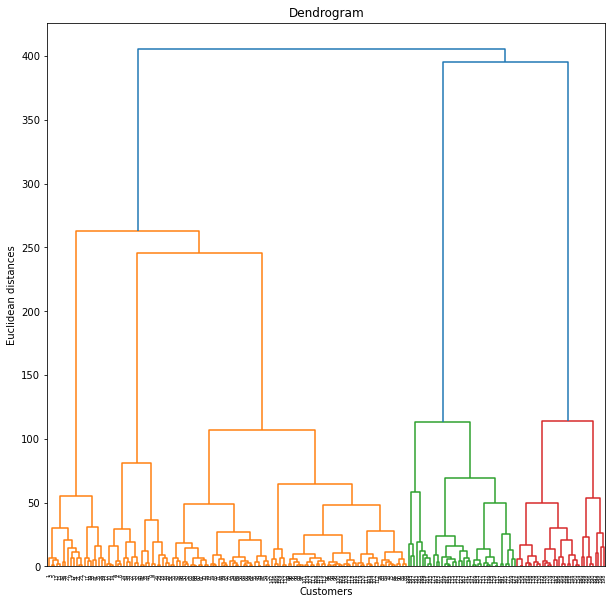

In [9]:
# Using the dendrogram to find the optimal number of clusters
#scipy means scientific python
import scipy.cluster.hierarchy as sch #sch is a alias name
#create object of dendrogram class which define in scipy.cluster.hierarchy
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #ward means Euclidean distances
plt.title('Dendrogram') #closeest distance of 2 points
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# In the above graph display no.of cluster=5

In [10]:
#fitting hierarchiacl clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
#AgglomerativeClustering inbuilt class
#create the object of AgglomerativeClustering class
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
y_pred=hc.fit_predict(X)

In [11]:
#add new column cluster
mc["Target"]=y_pred
mc.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


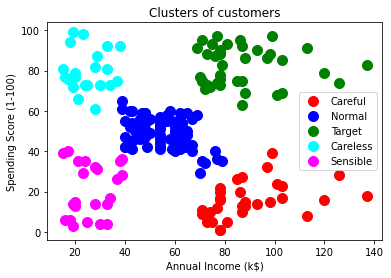

In [12]:
#scatter(X,Y)
        #numpy array(cluster no,first column)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1],s=100,c = 'red', 
            label = 'Careful')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue',
           label = 'Normal')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green',
           label = 'Target')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan',
           label='Careless')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta',
           label='Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
#Drop unwanted column Customerid
mc.drop("CustomerID",axis=1,inplace=True)

In [14]:
mc.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [15]:
columns=mc.columns
columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Target'],
      dtype='object')

In [16]:
for col in columns:
    print(col)
    print(mc[col].unique())

Genre
['Male' 'Female']
Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
Annual Income (k$)
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
Spending Score (1-100)
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]
Target
[4 3 1 2 0]


# Classification

In [17]:
#separate the data
customer_cat=mc.select_dtypes(object)
customer_cat.head()

,Genre
0,Male
1,Male
2,Female
3,Female
4,Female


In [18]:
customer_num=mc.select_dtypes(["int64","float64"])
customer_num.head()

,Age,Annual Income (k$),Spending Score (1-100),Target
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [19]:
customer_cat.columns

Index(['Genre'], dtype='object')

In [20]:
customer_num.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Target'], dtype='object')

In [21]:
#Import LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
for col in customer_cat:
    le=LabelEncoder()
    customer_cat[col]=le.fit_transform(customer_cat[col])
customer_cat.head()

,Genre
0,1
1,1
2,0
3,0
4,0


In [23]:
customer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Genre   200 non-null    int32
dtypes: int32(1)
memory usage: 928.0 bytes


In [24]:
customer_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Target                  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# concate

In [25]:
customer_new=pd.concat([customer_cat,customer_num],axis=1)
customer_new.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [26]:
customer_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Target                  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


# Logistic Regression

In [27]:
X=customer_new.drop("Target",axis=1)
Y=customer_new["Target"]

In [28]:
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [29]:
Y.head()

0    4
1    3
2    4
3    3
4    4
Name: Target, dtype: int64

In [30]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [31]:
def create_model(model):   # There model user defined object
    model.fit(X_train,Y_train)   # Train the model
    Y_pred = model.predict(X_test)  # Test the model
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,Y_pred))
    return model